# EDA

In [ ]:
import pandas as pd


"""
ID: Customer ID
Age: Customer's age in completed years
Experience: Number of years of professional experience
Income: Annual income of the customer ($000)
ZIP Code: Home Address ZIP code.
Family: Family size of the customer
CCAvg: Avg. spending on credit cards per month ($000)
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage: Value of house mortgage if any. ($000)
Personal Loan: Did this customer accept the personal loan offered in the last campaign?
Securities Account: Does the customer have a securities account with the bank?
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Does the customer use internet banking facilities?
CreditCard: Does the customer use a credit card issued by this Bank?
"""

data_raw = pd.read_csv("train_data.csv")

data_raw.info()
data_raw.head()

# dataset doesnt have any null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4500 non-null   int64  
 1   Age                 4500 non-null   int64  
 2   Experience          4500 non-null   int64  
 3   Income              4500 non-null   int64  
 4   ZIP Code            4500 non-null   int64  
 5   Family              4500 non-null   int64  
 6   CCAvg               4500 non-null   float64
 7   Education           4500 non-null   int64  
 8   Mortgage            4500 non-null   int64  
 9   Personal Loan       4500 non-null   int64  
 10  Securities Account  4500 non-null   int64  
 11  CD Account          4500 non-null   int64  
 12  Online              4500 non-null   int64  
 13  CreditCard          4500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 492.3 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,784,44,20,160,94606,2,7.6,1,0,0,1,0,0,0
1,1314,52,27,78,92008,4,3.6,3,141,0,0,0,1,0
2,184,29,3,148,92173,3,4.1,1,0,1,0,0,1,0
3,102,61,36,30,94608,3,1.3,2,0,0,0,0,0,0
4,3202,28,3,81,92121,4,0.2,1,0,0,0,0,0,0


In [ ]:
columns = list(data_raw.columns)
columns.remove("Personal Loan")
columns = ["Personal Loan"] + columns

data_raw = data_raw.reindex(columns=columns)

data_raw

,Personal Loan,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0,784,44,20,160,94606,2,7.60,1,0,1,0,0,0
1,0,1314,52,27,78,92008,4,3.60,3,141,0,0,1,0
2,1,184,29,3,148,92173,3,4.10,1,0,0,0,1,0
3,0,102,61,36,30,94608,3,1.30,2,0,0,0,0,0
4,0,3202,28,3,81,92121,4,0.20,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0,3232,62,37,24,90717,1,0.30,3,0,1,0,1,0
4496,0,4690,51,27,43,95053,4,1.10,2,164,0,0,1,1
4497,0,3929,57,33,61,92115,3,2.67,1,0,0,0,1,0
4498,0,166,27,1,43,94706,1,1.50,1,0,0,0,1,0


In [ ]:
# i write this cell for finding invalid values
data_raw.sort_values(["Family"])
data_raw.sort_values(["Income"])
data_raw.sort_values(["Age"])
data_raw.sort_values(["CCAvg"])
data_raw.sort_values(["Education"])
data_raw.sort_values(["Mortgage"])

data_raw.sort_values(["Experience"])
data_raw[data_raw["Experience"] < 0].head()

# Experience field has negative values

,Personal Loan,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
20,0,2103,25,-1,81,92647,2,1.60,3,0,0,0,1,1
110,0,2431,23,-1,73,92120,4,2.60,1,0,0,0,1,0
115,0,90,25,-1,113,94303,4,2.30,3,0,0,0,0,1
161,0,910,23,-1,149,91709,1,6.33,1,305,0,0,0,1
241,0,3077,29,-1,62,92672,2,1.75,3,0,0,0,0,1


In [ ]:
data = data_raw.copy(deep=True)

data["Experience"] = data["Experience"].abs()

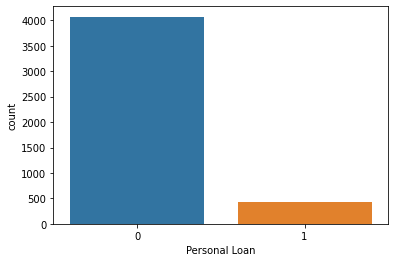

In [ ]:
import seaborn as sns

sns.countplot(x="Personal Loan", data=data)
# dataset is very imbalanced

In [ ]:
dropped_cols = ["ID", "ZIP Code"]
data.drop(dropped_cols, axis=1, inplace=True)
# these columns are not useful for building a model because they dont have enough discriminative information

data

,Personal Loan,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0,44,20,160,2,7.60,1,0,1,0,0,0
1,0,52,27,78,4,3.60,3,141,0,0,1,0
2,1,29,3,148,3,4.10,1,0,0,0,1,0
3,0,61,36,30,3,1.30,2,0,0,0,0,0
4,0,28,3,81,4,0.20,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0,62,37,24,1,0.30,3,0,1,0,1,0
4496,0,51,27,43,4,1.10,2,164,0,0,1,1
4497,0,57,33,61,3,2.67,1,0,0,0,1,0
4498,0,27,1,43,1,1.50,1,0,0,0,1,0


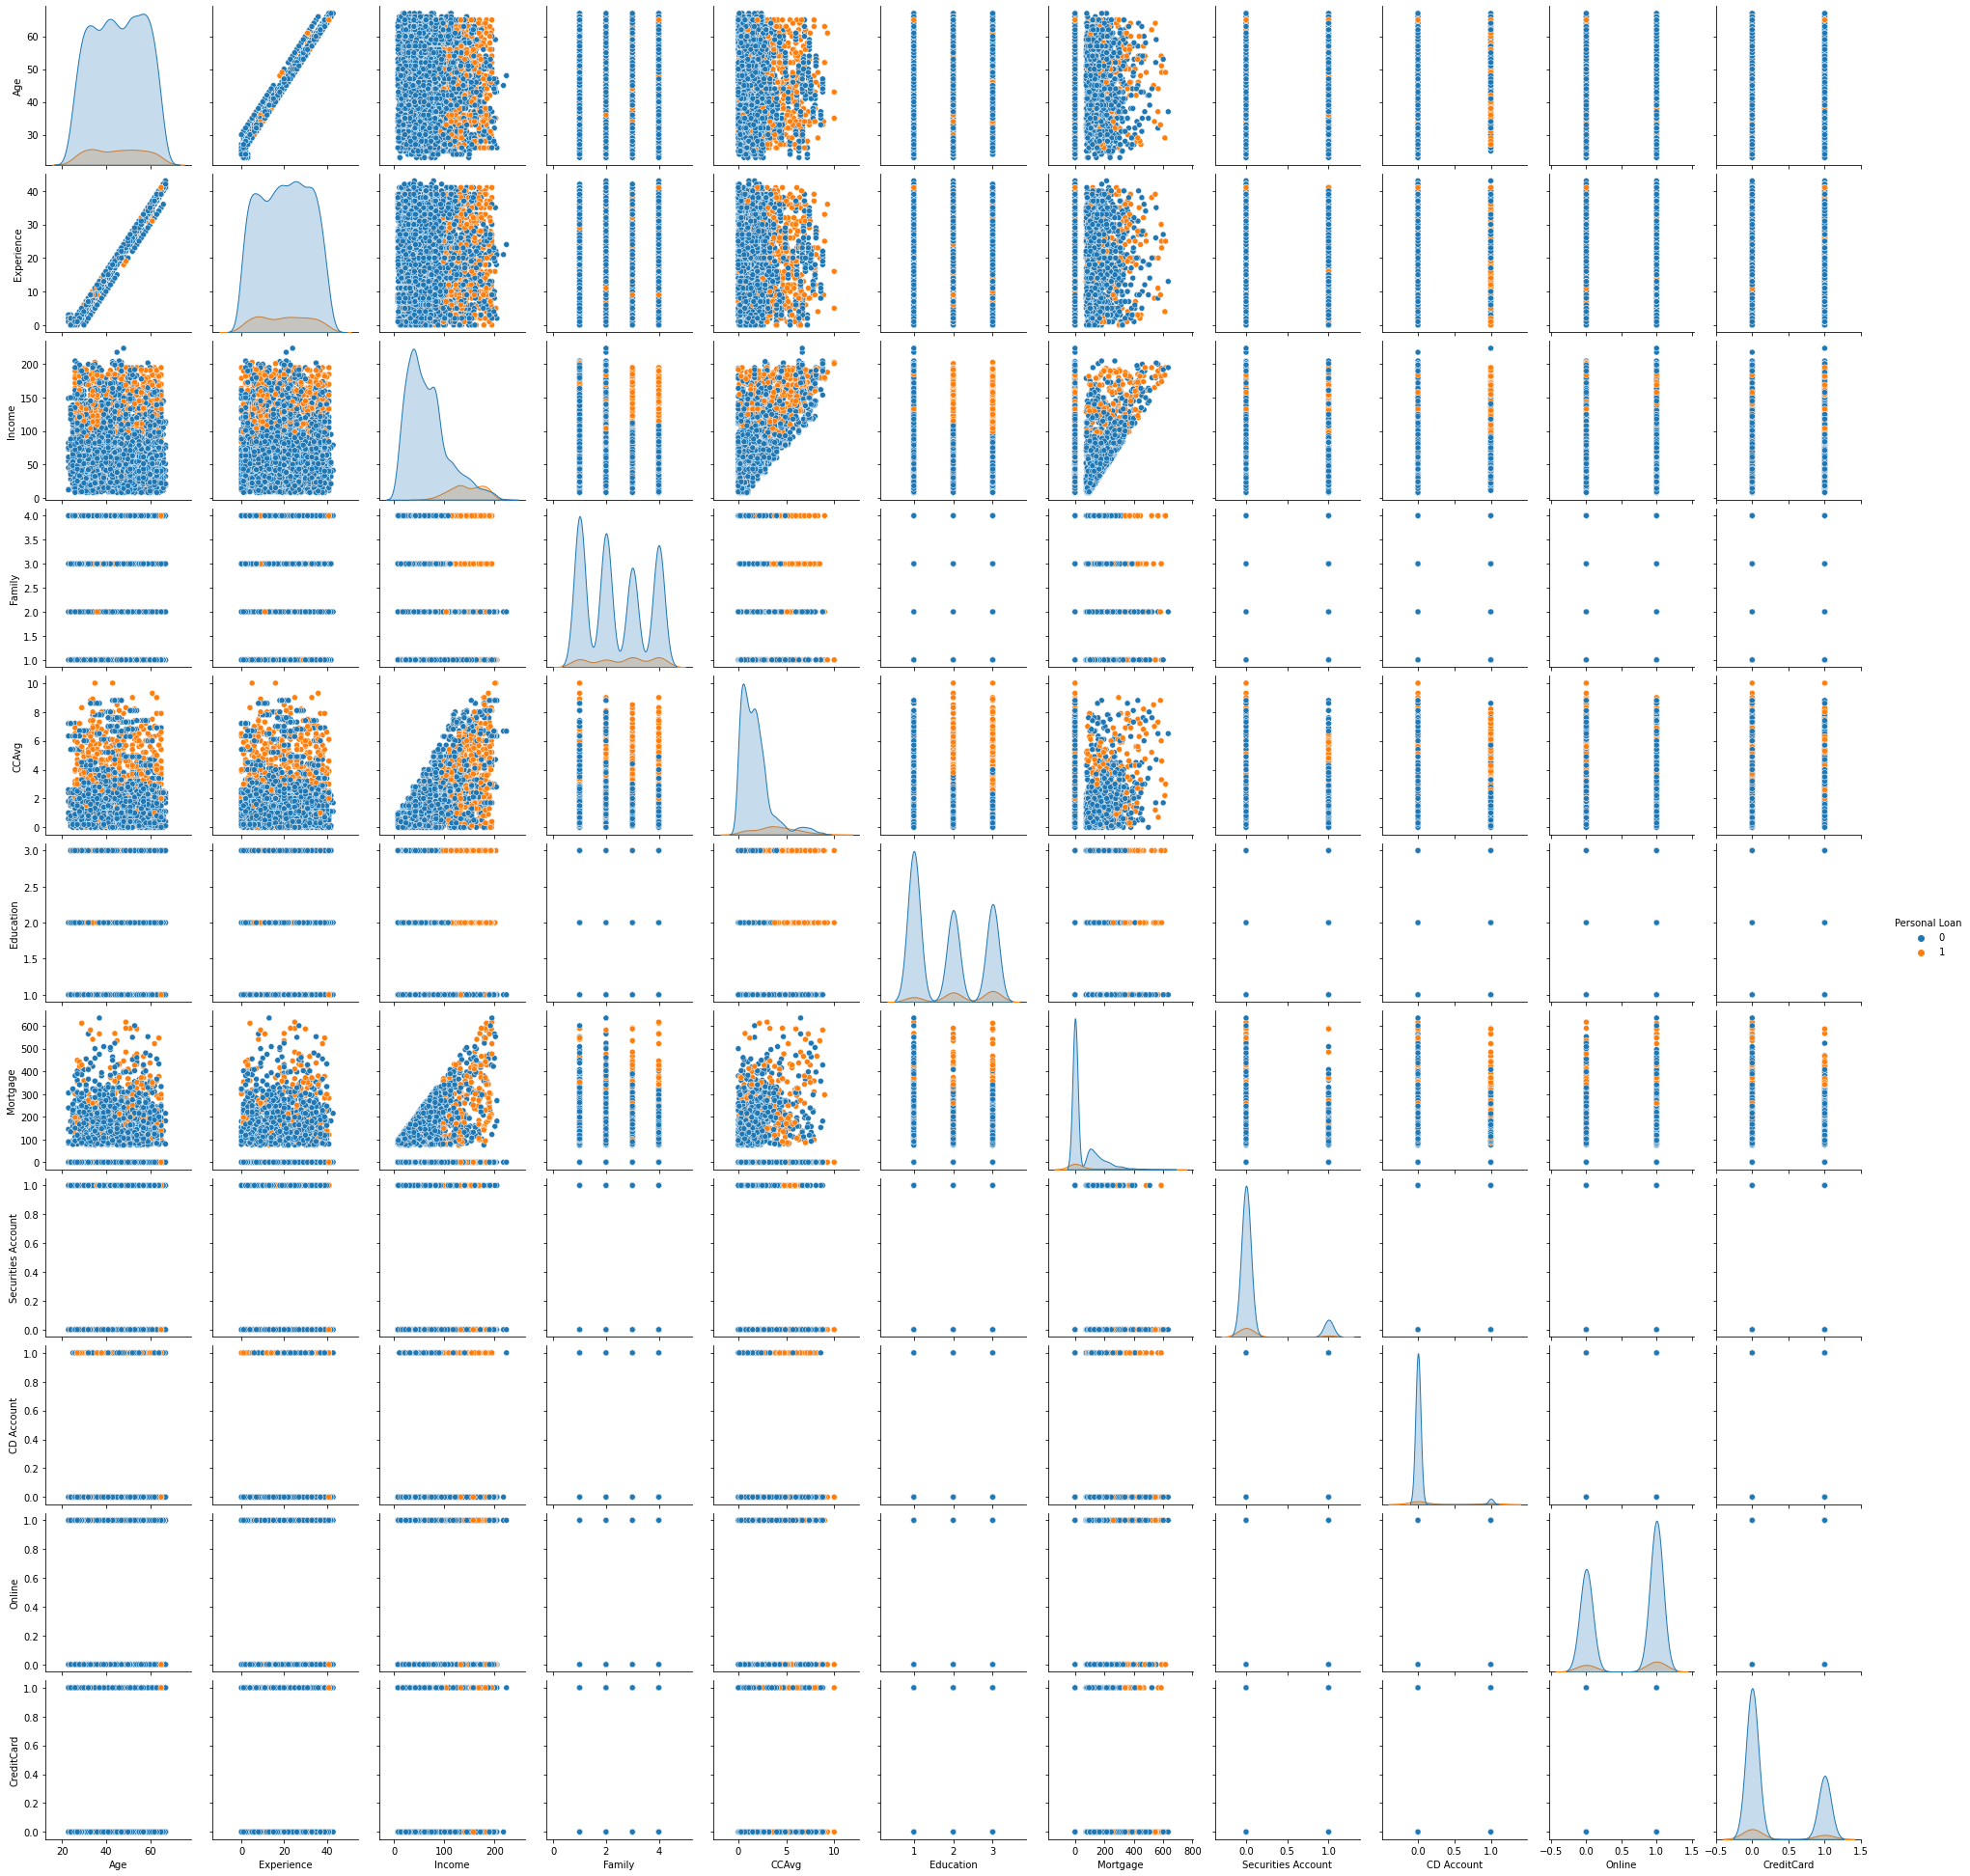

In [ ]:
import seaborn as sns

sns.pairplot(data=data, hue='Personal Loan')

# Income is a good feature and can almost classify
# CCAvg can be a useful feature because in two parts, classes have different behaviors
# Mortage can be useful because in a part, 1 class almost has not appeared

# (Income, Family) can be useful because when Family is 3 or 4 and Income more than a value, almost of observations are 1
# (Income, Education) and (Income, CD Account) are like (Income, Family)
# (Family, CCAvg) and (Family, Mortage) can be useful
# (CCAvg, Education) and (CCAvg, CD Account) can be useful

In [ ]:
data.describe()

,Personal Loan,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.095111,45.330667,20.140444,73.709778,2.402444,1.939869,1.882000,56.579556,0.104667,0.060222,0.595333,0.296222
std,0.293401,11.478828,11.428832,46.061299,1.145764,1.752351,0.840509,101.451763,0.306157,0.237925,0.490882,0.456641
min,0.000000,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,20.000000,63.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,55.000000,30.000000,99.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


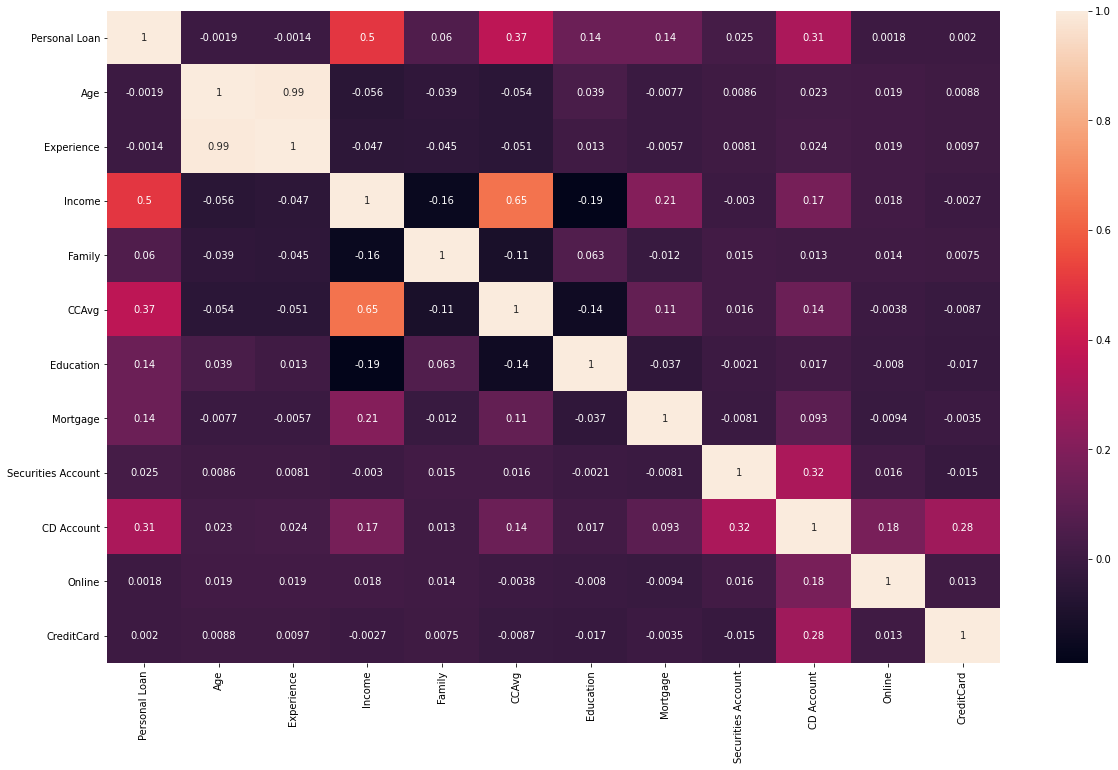

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

_, ax = plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(method="pearson"), annot=True, ax=ax)
# as i said, this heatmap shows us that Income is the most related feature
# after Income we have CCAvg and CD Account but they are related a little
# and this heatmap shows us Age and Experience are completely related

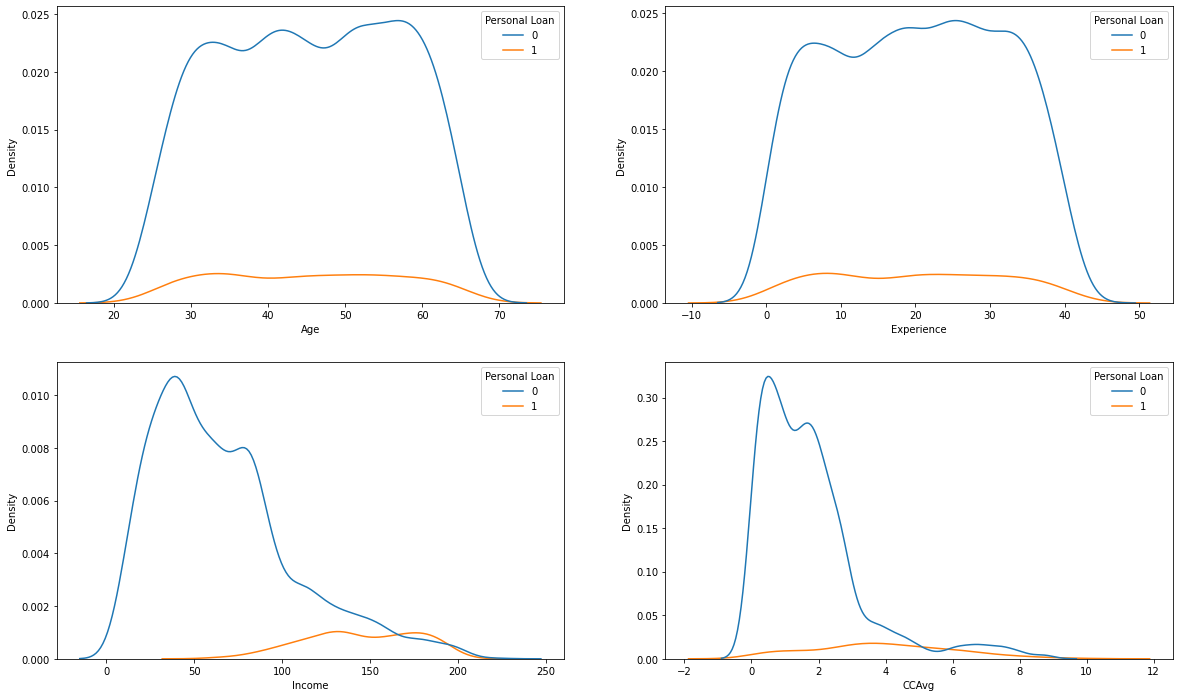

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

_, ax=plt.subplots(2, 2, figsize=(20,12))
sns.kdeplot(data=data, x='Age', hue='Personal Loan', ax=ax[0, 0])
sns.kdeplot(data=data, x='Experience', hue='Personal Loan', ax=ax[0, 1])
sns.kdeplot(data=data, x='Income', hue='Personal Loan', ax=ax[1, 0])
sns.kdeplot(data=data, x='CCAvg', hue='Personal Loan', ax=ax[1, 1])
# i plot these columns for making Bin features from them and i want to find number of cuts

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data2 = data.copy(deep=True)

data2["AgeBin"] = pd.cut(data2["Age"], 5)
data2["ExperienceBin"] = pd.cut(data2["Experience"], 4)
data2["IncomeBin"] = pd.qcut(data2["Income"], 4)
data2["CCAvgBin"] = pd.qcut(data2["CCAvg"], 5)
data2["HasMortgage"] = data2["Mortgage"] != 0
data2

encoder = LabelEncoder()
data2["AgeBin"] = encoder.fit_transform(data2["AgeBin"])
data2["ExperienceBin"] = encoder.fit_transform(data2["ExperienceBin"])
data2["IncomeBin"] = encoder.fit_transform(data2["IncomeBin"])
data2["CCAvgBin"] = encoder.fit_transform(data2["CCAvgBin"])
data2["HasMortgage"] = encoder.fit_transform(data2["HasMortgage"])
data2

,Personal Loan,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,AgeBin,ExperienceBin,IncomeBin,CCAvgBin,HasMortgage
0,0,44,20,160,2,7.60,1,0,1,0,0,0,2,1,3,4,0
1,0,52,27,78,4,3.60,3,141,0,0,1,0,3,2,2,4,1
2,1,29,3,148,3,4.10,1,0,0,0,1,0,0,0,3,4,0
3,0,61,36,30,3,1.30,2,0,0,0,0,0,4,3,0,2,0
4,0,28,3,81,4,0.20,1,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0,62,37,24,1,0.30,3,0,1,0,1,0,4,3,0,0,0
4496,0,51,27,43,4,1.10,2,164,0,0,1,1,3,2,1,1,1
4497,0,57,33,61,3,2.67,1,0,0,0,1,0,3,3,1,3,0
4498,0,27,1,43,1,1.50,1,0,0,0,1,0,0,0,1,2,0


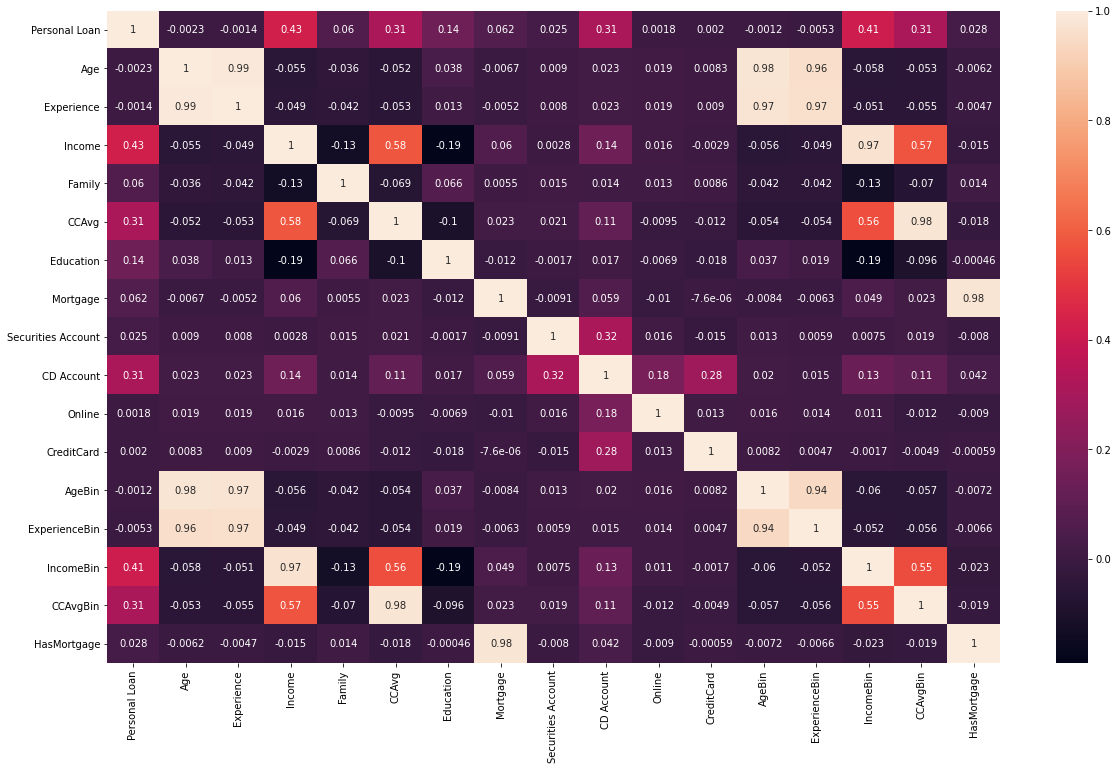

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

_, ax = plt.subplots(figsize=(20,12))
sns.heatmap(data2.corr(method="spearman"), annot=True, ax=ax)

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[data.columns[1:]], data[data.columns[0]], test_size=0.3, shuffle=True, random_state=0)

In [ ]:
from sklearn.model_selection import ShuffleSplit

splitter = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()
# decision tree algorithm can work well with numeric or continuous variables and for these reasons i work with data(instead of data2)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_leaf": [1, 5, 10],
    "class_weight": ["balanced", ]
}
# i set class_weight just "balanced" because dataset is very imbalanced and i want to model can predict well in both classes

model = Pipeline([
    ("feature_selector", RFECV(classifier, cv=splitter, scoring="f1", n_jobs=-1)),
    ("classifier", GridSearchCV(classifier, param_grid=param_grid, scoring='roc_auc', cv=splitter, return_train_score=True))
])

model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('feature_selector',
                 RFECV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.1, train_size=None),
                       estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=...
                                                               min_samples_spl

In [ ]:
final_features = data.columns[1:][model["feature_selector"].get_support()]

final_features

Index(['Income', 'Family', 'CCAvg', 'Education'], dtype='object')

In [ ]:
model["classifier"].best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1}

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)

report = classification_report(y_test, predictions)

print(report)
# model learned both of classes and in our final target or 1 class gets high recall

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1225
           1       0.57      0.98      0.72       125

    accuracy                           0.93      1350
   macro avg       0.78      0.95      0.84      1350
weighted avg       0.96      0.93      0.94      1350



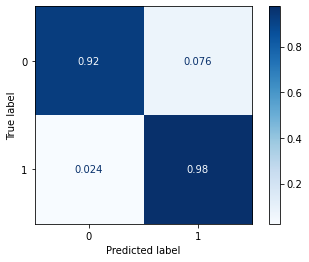

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, normalize="true", cmap="Blues")

[Text(472.15384615384613, 570.7800000000001, 'Income <= 92.5\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]'),
 Text(171.69230769230768, 407.70000000000005, 'CCAvg <= 2.95\ngini = 0.123\nsamples = 72.4%\nvalue = [0.934, 0.066]'),
 Text(85.84615384615384, 244.62, 'gini = -0.0\nsamples = 68.7%\nvalue = [1.0, 0.0]'),
 Text(257.53846153846155, 244.62, 'CCAvg <= 4.2\ngini = 0.472\nsamples = 3.7%\nvalue = [0.383, 0.617]'),
 Text(171.69230769230768, 81.53999999999996, 'gini = 0.439\nsamples = 3.0%\nvalue = [0.325, 0.675]'),
 Text(343.38461538461536, 81.53999999999996, 'gini = -0.0\nsamples = 0.7%\nvalue = [1.0, 0.0]'),
 Text(772.6153846153845, 407.70000000000005, 'Education <= 1.5\ngini = 0.293\nsamples = 27.6%\nvalue = [0.179, 0.821]'),
 Text(600.9230769230769, 244.62, 'Family <= 2.5\ngini = 0.5\nsamples = 16.8%\nvalue = [0.494, 0.506]'),
 Text(515.0769230769231, 81.53999999999996, 'gini = 0.14\nsamples = 14.7%\nvalue = [0.924, 0.076]'),
 Text(686.7692307692307, 81.53999999999996, 'gini =

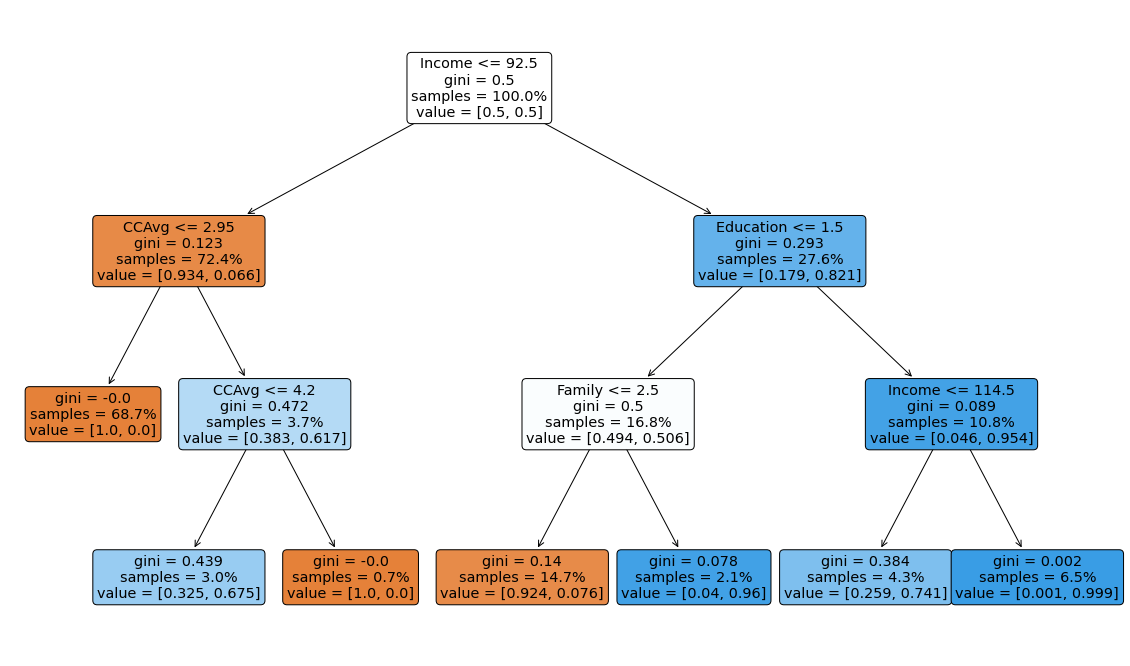

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(20,12))
plot_tree(model["classifier"].best_estimator_, feature_names=final_features, max_depth=3, proportion=True, filled=True, rounded=True, ax=ax)
# as we saw and guessed before, Income and CCAvg are the most useful and important features